# Training Loop
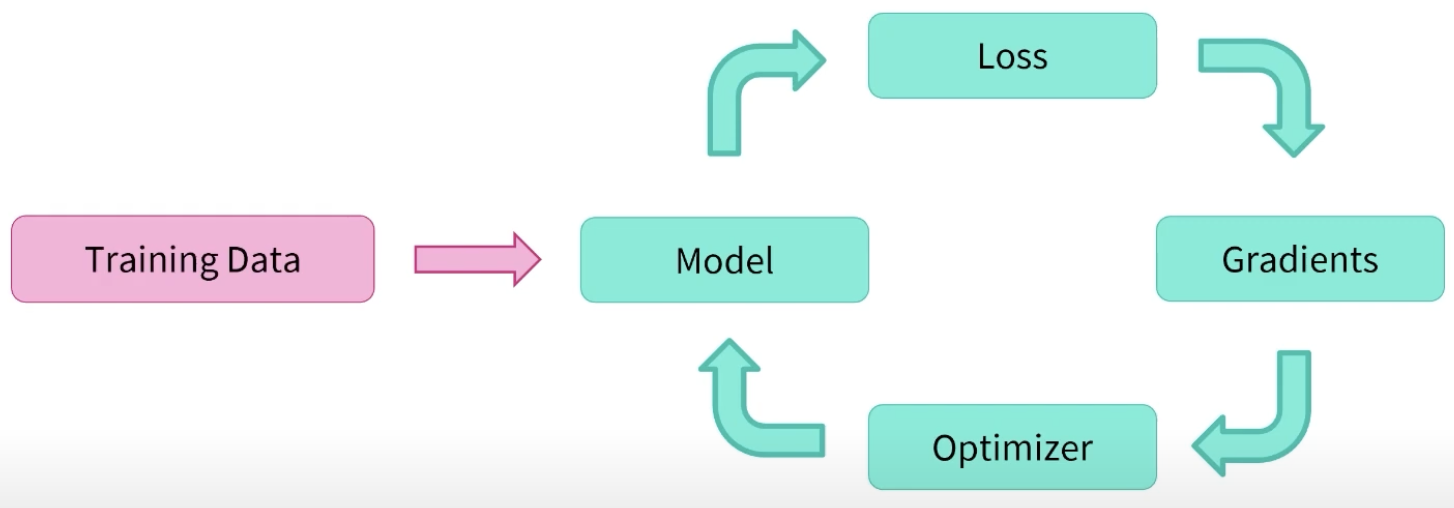

- Training data is sent to the models in batches.
- Model provides predictions on the training data.
- Loss is evaluated on the predictions using the ground truth/labels.
- Gradients (derivatives) are calculated of the model weights and sent to the optimizers.
- Optimizer then updates the weights, and make them a little bit better.
- We then repeat the process with a new batch of the training data.

# BackPropagation

## Step 0: Initial Setup

Let us build a neural network with three layers:
* Input layer with two inputs neurons
* One hidden layer with two neurons
* Output layer with a single neuron

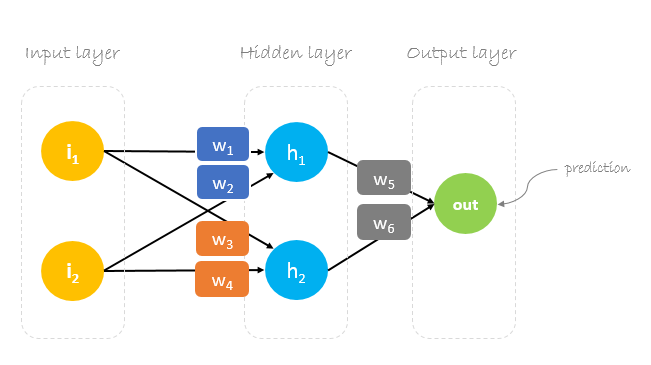

## Weights - the most critical thing!
Neural network training is about finding weights that minimize prediction error. We usually start our training with a set of randomly generated weights.Then, backpropagation is used to update the weights in an attempt to correctly map arbitrary inputs to outputs.

Our RANDOM initial weights will be as following:
```
w1 = 0.11, w2 = 0.21, w3 = 0.12, w4 = 0.08, w5 = 0.14 and w6 = 0.15
```

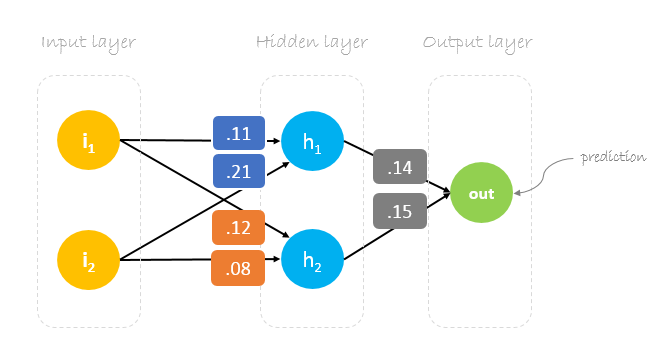

Our dataset has one sample with two inputs (``` i1, i2 ```) and one output (``` z ```).
Our single sample is as following:
```
inputs=[2, 3] and output=[1]
```


In [ ]:
h1 = i1*w1 + i2*w2
h2 = i1*w3 + i2*w4
out = h1*w5 + h2*w6
# OR
out = (i1*w1 + i2*w2)*w5 + (i1*w3 + i2*w4)*w6

h1 = 2*0.11 + 3*0.21 = 0.85
h2 = 2*0.12 + 3*0.08 = 0.48
out = 0.85*0.14 + 0.48*0.15 = 0.191

## Step 1: The Forward Pass

We will use given weights and inputs to predict the output. Inputs are multiplied by weights; the results are then passed forward to next layer.

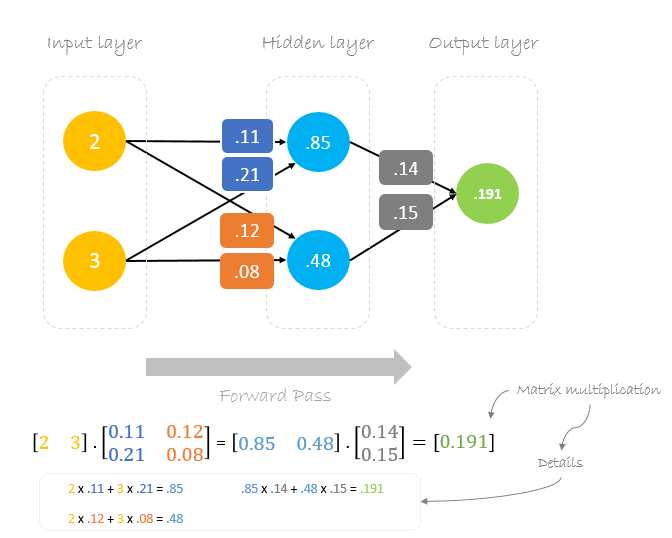



## Step 2: Calculating error after the forward pass
Now, it’s time to find out how our network performed by calculating the difference between the actual output and predicted one. It’s clear that our network output, or prediction, is not even close to actual output. We can calculate the difference or the error as following:
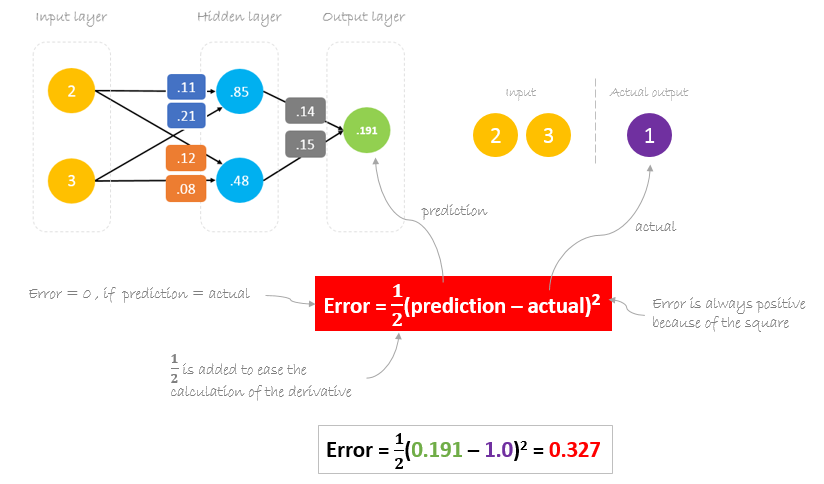


f(E) = 0.5 * (out - actual)^2

= 0.5 * ((i1 * w1 + i2 * w2) * w5 + (i1*w3 + i2*w4) * w6 - actual)^2

## Step 3: Reducing Error
Our main goal of the training is to reduce the error or the difference between prediction and actual output. Since actual output is constant, “not changing”, the only way to reduce the error is to change prediction value. The question now is, how to change prediction value?

By decomposing prediction into its basic elements we can find that weights are the variable elements affecting prediction value. In other words, in order to change prediction value, we need to change weights values.

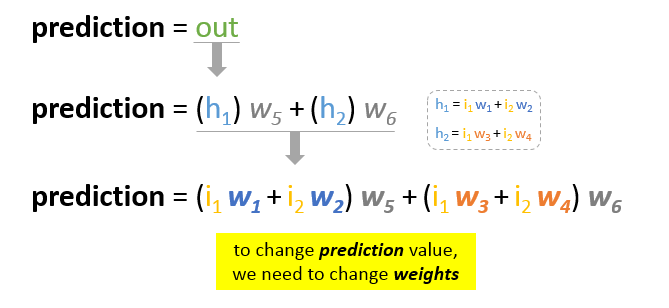

# The question now is how to change or update the weights value so that the error is reduced?

# The answer is Backpropagation!

Backpropagation, short for “backward propagation of errors”, is a mechanism used to update the weights **using gradient descent**. It calculates the gradient of the error function with respect to the neural network’s weights. The calculation proceeds backwards through the network.



# Gradient Descent
Gradient descent (GD) is an iterative first-order optimisation algorithm, used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning (DL) to minimise a cost/loss function (e.g. in a linear regression).

**Basic Requirements:**

Gradient descent algorithm does not work for all functions. There are two specific requirements. A function has to be:
* differentiable
* convex

If a function is differentiable it has a derivative for each point in its domain — not all functions meet these criteria. First, let’s see some examples of functions meeting this criterion:

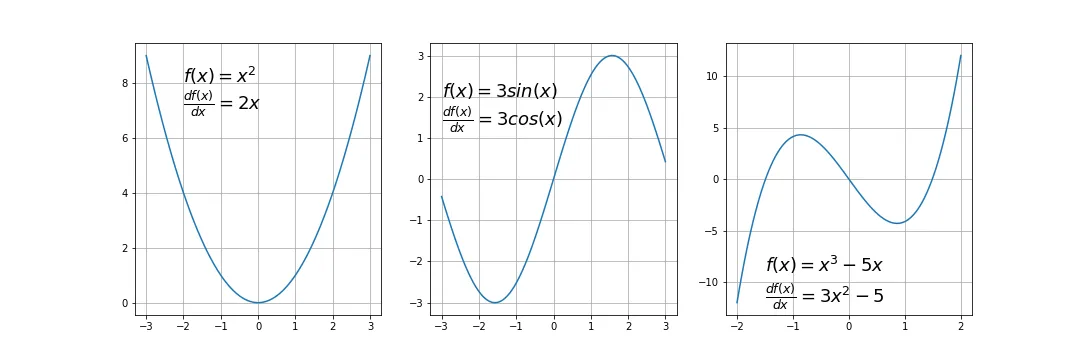

Typical non-differentiable functions have a step a cusp or a discontinuity:
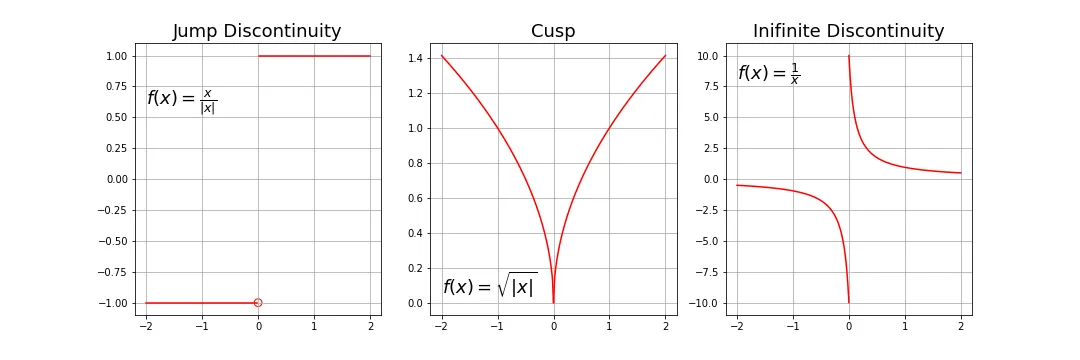

For a univariate function to be convex, calculate the second derivative and check if its value is always bigger than 0.

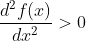

## But what is Gradient?

Before jumping into code one more thing has to be explained — what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.


A gradient for an n-dimensional function f(x) at a given point p is defined as follows:

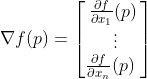

The upside-down triangle is a so-called nabla symbol and you read it “del”.




**Example:**


image.png

Let’s assume we are interested in a gradient at point p(10,10):

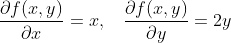

so consequently:

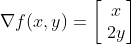

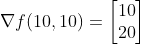

## Step 3.1: Changing the weights
New value of weight = Previous value of weight - learning rate * gradient

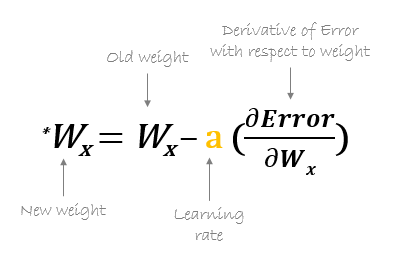

In our example, to update ```w6```, we take the current ```w6``` and subtract the partial derivative of error function with respect to ```w6```. Also, we multiply the derivative of the error function by the learning rate.


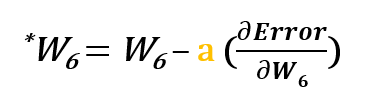

Error function:

    f(x) = 0.5 (prediction - actual)^2


Derivative of the error function with respect to weights:
First, we calculcate the derivative with respect to prediction

    f`(x) = prediction-actual = 0.191-1 = -0.891


Derivative of Prediction with respect to w6:

    Prediction(g) = (i1w1+i2w2)w5 + (i1w3+i2w4)w6


    g`(w6) = (i1w3+i2w4) = h2 = 0.48

Final Derivative:

    f`(x)*g`(w6)= -0.891 * 0.48 = -0.42768

Let's assume learning rate of 0.01

New W6 = Old W6 - learning rate * gradient

       = 0.15 - 0.01 * -0.42768
       
       = 0.1542768

The derivation of the error function is evaluated by applying the chain rule as following:
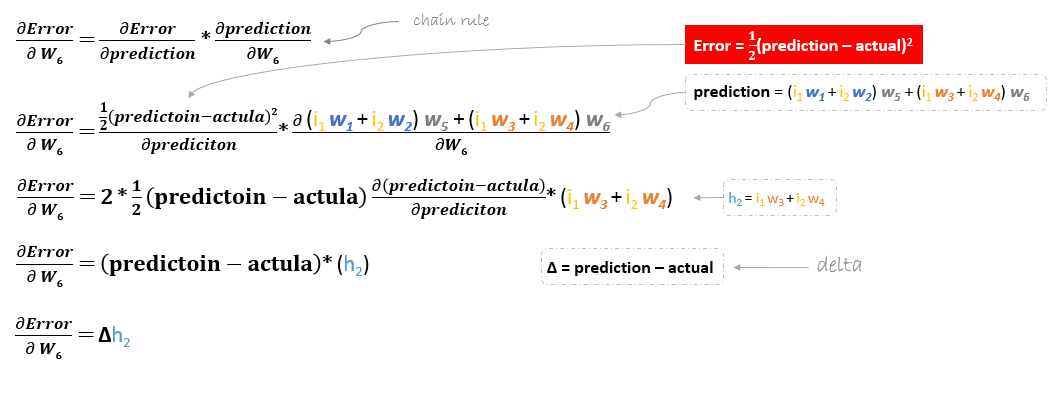

So to update ```w6``` we can apply the following formula:


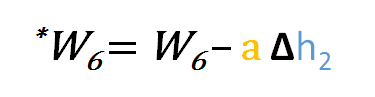

Similarly, we can derive the update formula for ```w5``` and any other weights existing between the output and the hidden layer.

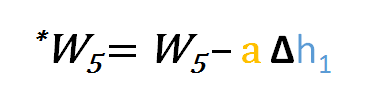

W5 = 0.14

a = 0.01

Delta = -0.891

h1 = 0.85

New W5 = W5 - a * Delta * h1 = 0.14 - 0.01 * -0.891 * 0.85 = 0.14757

However, when moving backward to update the weights existing between input and hidden layer, the partial derivative for the error function with respect to ```w1```, for example, will be as following:
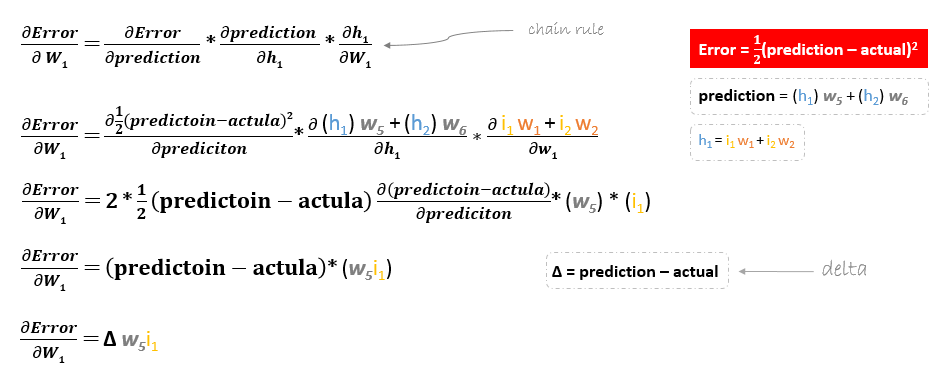

We can find the update formula for the remaining weights ```w2, w3 and w4``` in the same way.

In summary, the update formulas for all weights will be as following:

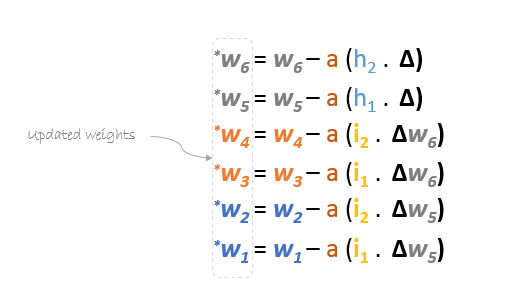

We can rewrite the update formulas in matrices as following:
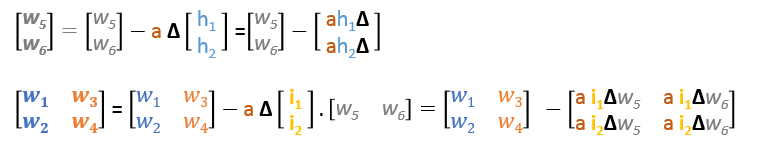

## Step 4: The Backward Pass


Using derived formulas we can find the new weights.

Remember, learning rate is a hyperparameter which means that we need to manually guess its value.

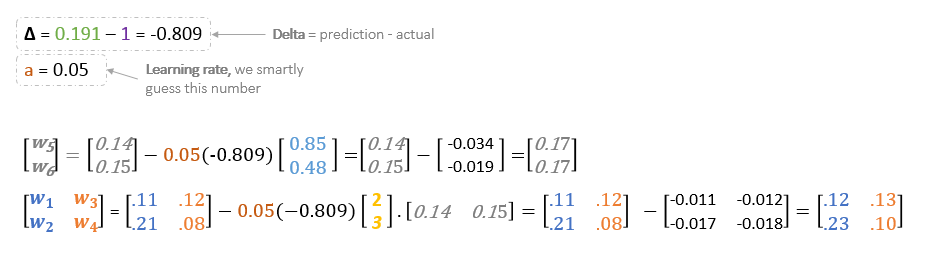

Now, using the new weights we will repeat the forward pass

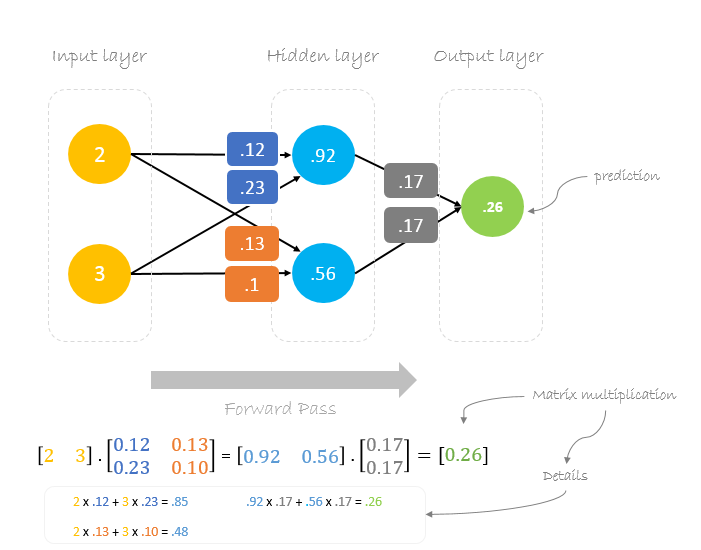



We can notice that the prediction 0.26 is a little bit closer to actual output than the previously predicted one 0.191. We can repeat the same process of backward and forward pass until error is close or equal to zero.

https://hmkcode.com/netflow/

## Let's try to code it

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load and preprocess the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
mnist_images = mnist.data.astype('float32') / 255.0
mnist_labels = np.eye(10)[mnist.target.astype('int')]

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    mnist_images, mnist_labels, test_size=0.1, random_state=42
)

# Define the neural network architecture with only NumPy
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def dense_layer(x, weights, bias, activation='relu'):
    z = np.dot(x, weights) + bias
    return relu(z) if activation == 'relu' else softmax(z)

# Initialize weights and biases
input_size = 28 * 28
hidden_size = 128
output_size = 10

weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
bias_input_hidden = np.zeros((1, hidden_size))

weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
bias_hidden_output = np.zeros((1, output_size))

# Training loop for one epoch
batch_size = 64
learning_rate = 0.001
num_batches = len(train_images) // batch_size
epochs = 2

for epoch in range(epochs):
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size

        # Forward pass
        input_data = train_images[start_idx:end_idx]
        hidden_layer = dense_layer(input_data, weights_input_hidden, bias_input_hidden)
        output_layer = dense_layer(hidden_layer, weights_hidden_output, bias_hidden_output, activation='softmax')

        # Compute loss
        loss = -np.sum(train_labels[start_idx:end_idx] * np.log(output_layer + 1e-8)) / batch_size

        # Backward pass (gradient descent)
        grad_output = output_layer - train_labels[start_idx:end_idx]
        grad_hidden = np.dot(grad_output, weights_hidden_output.T) * (hidden_layer > 0)

        # Update weights and biases
        weights_hidden_output -= learning_rate * np.dot(hidden_layer.T, grad_output) / batch_size
        bias_hidden_output -= learning_rate * np.sum(grad_output, axis=0, keepdims=True) / batch_size

        weights_input_hidden -= learning_rate * np.dot(input_data.T, grad_hidden) / batch_size
        bias_input_hidden -= learning_rate * np.sum(grad_hidden, axis=0, keepdims=True) / batch_size

    # Compute accuracy on validation set
    hidden_layer_val = dense_layer(test_images, weights_input_hidden, bias_input_hidden)
    output_layer_val = dense_layer(hidden_layer_val, weights_hidden_output, bias_hidden_output, activation='softmax')
    predictions_val = np.argmax(output_layer_val, axis=-1)
    true_labels_val = np.argmax(test_labels, axis=-1)
    accuracy = np.mean(predictions_val == true_labels_val)

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


# Training Loop
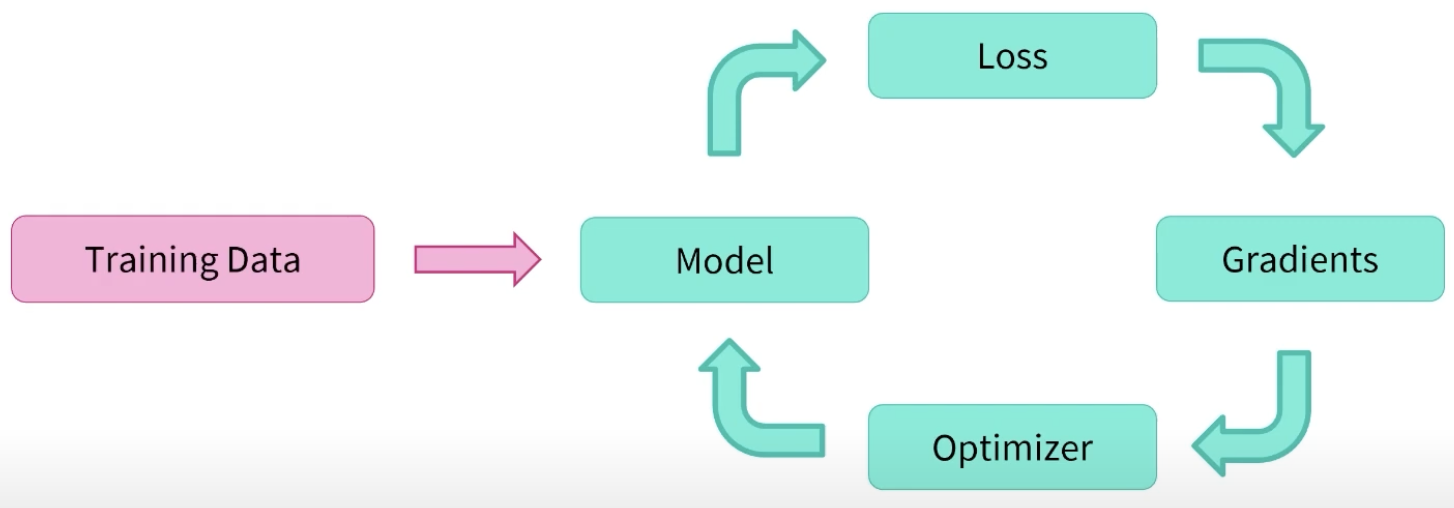

- Training data is sent to the models in batches.
- Model provides predictions on the training data.
- Loss is evaluated on the predictions using the ground truth/labels.
- Gradients (derivatives) are calculated of the model weights and sent to the optimizers.
- Optimizer then updates the weights, and make them a little bit better.
- We then repeat the process with a new batch of the training data.